In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os

load_dotenv()

False

In [2]:
POSTGRESQL_HOST_NAME = "imap.new.foldr.org"
POSTGRESQL_DB_NAME = "ha_crawler"
DATABASE_NAME = "home_assistant_blueprints.sqlite"
TOPICS_TABLE = "topics"

In [3]:
# read all data from the database
database_url = f"sqlite:///{DATABASE_NAME}"
_df = pd.read_sql(f"SELECT * FROM {TOPICS_TABLE}", database_url)

In [4]:
_df["created_at"] = pd.to_datetime(_df["created_at"], utc=True)
_df["last_posted_at"] = pd.to_datetime(_df["last_posted_at"], utc=True, format="mixed")
_df["crawled_at"] = pd.to_datetime(_df["crawled_at"], utc=True)
_df['tags'] = _df['tags'].apply(eval)


C:\Users\Adrian\AppData\Local\Temp\ipykernel_8936\3510722070.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  _df["created_at"].dt.to_period("M").value_counts().sort_index().plot(kind="bar")


<Axes: title={'center': 'Count of created topics by month'}, xlabel='created_at', ylabel='Count'>

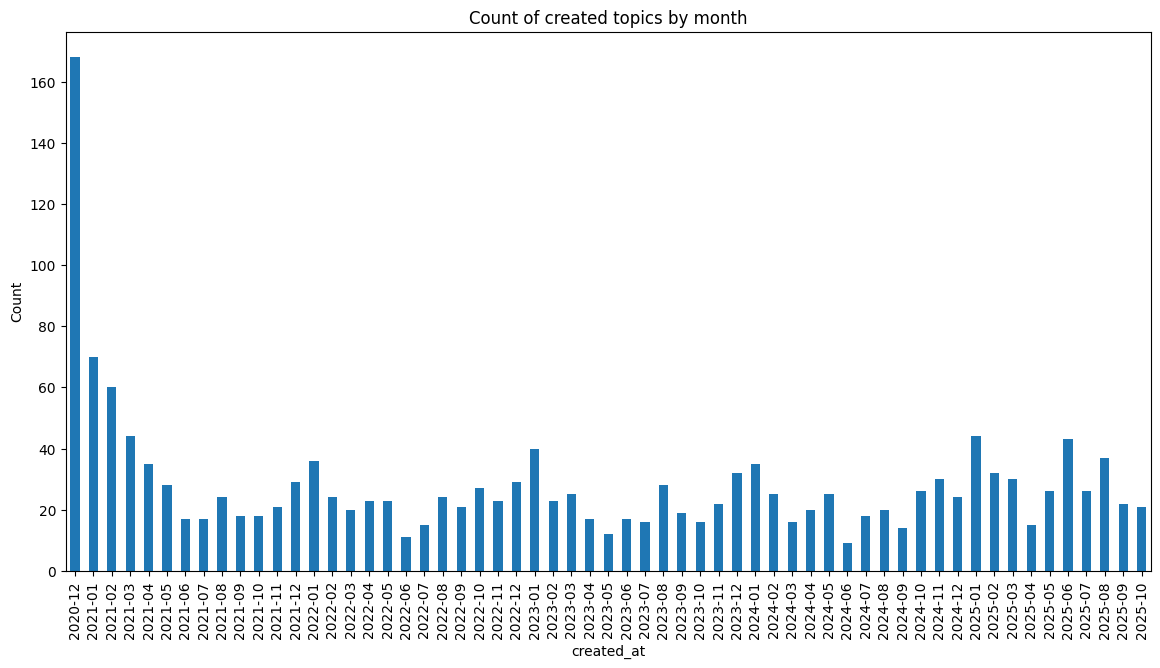

In [5]:
# histogram by created_at
plt.figure(figsize=(14, 7))
plt.title("Count of created topics by month")
plt.xlabel("Month")
plt.ylabel("Count")
_df["created_at"].dt.to_period("M").value_counts().sort_index().plot(kind="bar")

<Axes: title={'center': 'Count of created topics by time in a day'}, xlabel='created_at', ylabel='Count'>

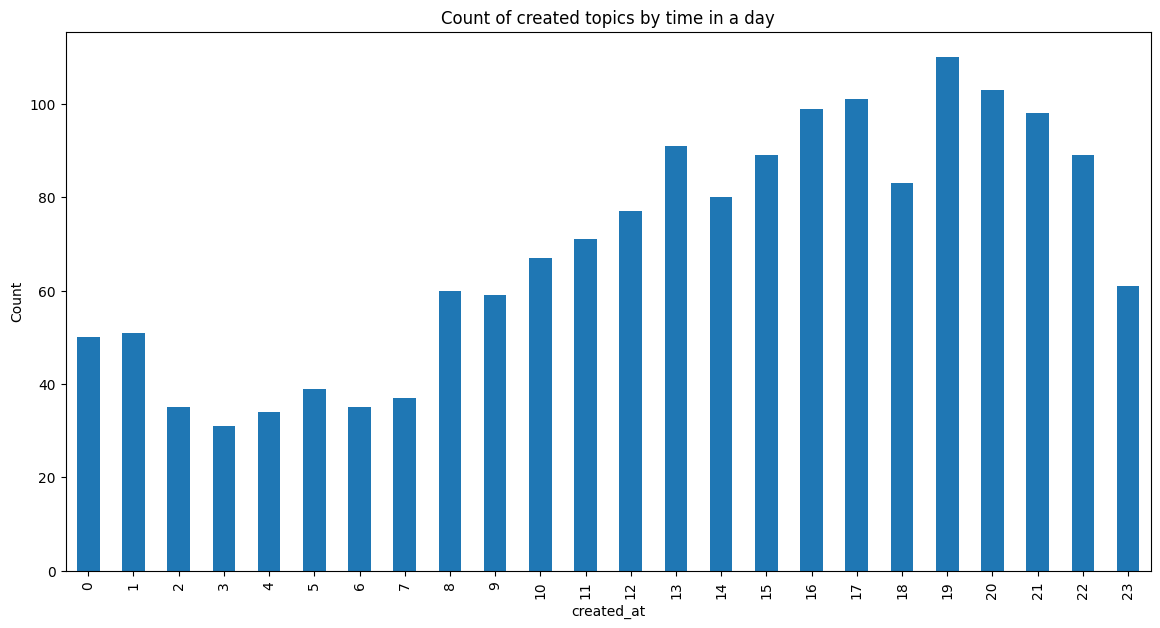

In [6]:
# histogram by created time in a day
plt.figure(figsize=(14, 7))
plt.title("Count of created topics by time in a day")
plt.xlabel("Time")
plt.ylabel("Count")
_df["created_at"].dt.hour.value_counts().sort_index().plot(kind="bar")


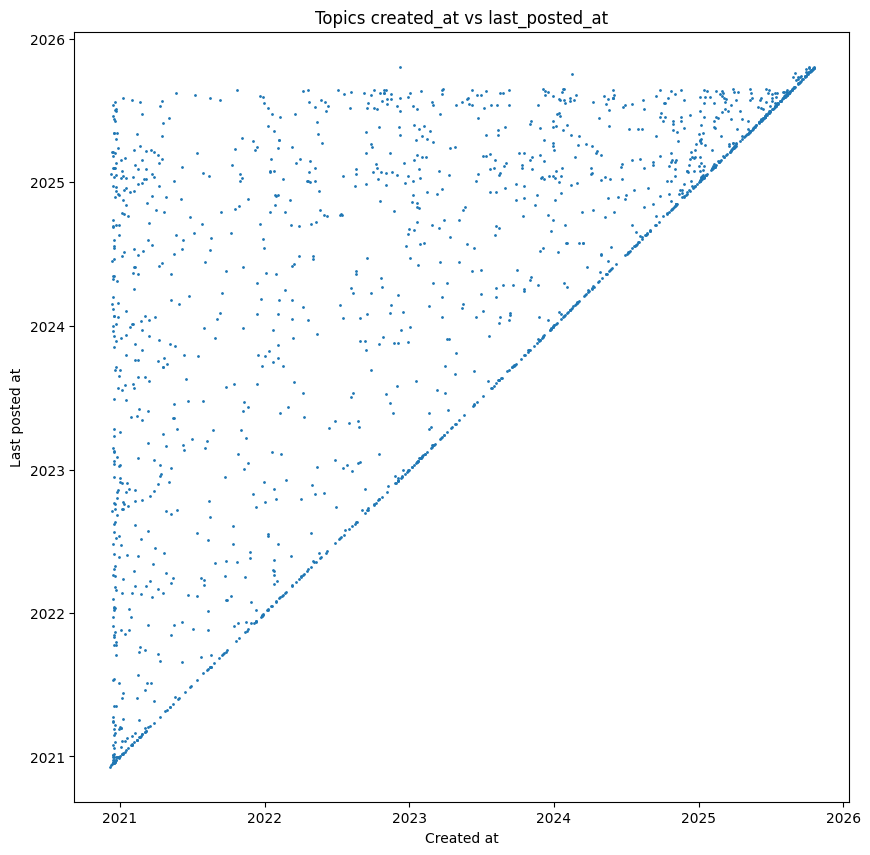

In [7]:
# plot topics based on created_at as x and last_posted_at as y
plt.figure(figsize=(10, 10))
plt.title("Topics created_at vs last_posted_at")
plt.xlabel("Created at")
plt.ylabel("Last posted at")
plt.scatter(_df["created_at"], _df["last_posted_at"], s=1)



In [8]:
# Filter df by created_at is before than 2021-03-31 and last_posted_at is after than 2021-01-01
df = _df[(_df["created_at"] < "2021-03-31") & (_df["last_posted_at"] > "2024-01-01")]
columns = ["title", "posts_count", "reply_count", "tags"]
df = df.reset_index(drop=True) # drop index
df[columns]

,title,posts_count,reply_count,tags
0,Zigbee2MQTT - Sonoff Wireless Switch (SNZB-01),26,10,"[mqtt, switch, zigbee, sonoff]"
1,ZHA - IKEA open/close switch for covers (e.g K...,28,15,"[switch, zha, blueprint, cover]"
2,Plex theatre light dimmer (Tautulli),21,9,"[automation, mqtt, zigbee, zigbee2mqtt]"
3,Müller Licht tint remote,22,8,"[switch, zigbee, lights, blueprint, deconz]"
4,Zooz ZEN34 - Zwave-JS,56,32,[]
...,...,...,...,...
106,ZHA - IKEA Tradfri on/off switch (incl dimmer),63,37,"[switch, zha, blueprint]"
107,Blue print to work with Aqara vibration sensor...,34,19,"[automation, zigbee, blueprint, aqara]"
108,"Window open, climate off",294,215,"[blueprint, climate]"
109,Zigbee2MQTT - Tuya 4-button Scene Switch (TS0044),163,89,"[mqtt, switch, zigbee, tuya]"


In [9]:
# concat tags lists from all rows and create unique tags list
tags = _df["tags"].sum()
tags = list(set(tags))

In [10]:
# create a new column for each tag and fill it with 0 or 1
df = _df.copy()
for tag in tags:
    df[f'tag_{tag}'] = df["tags"].apply(lambda x: 1 if tag in x else 0)

C:\Users\Adrian\AppData\Local\Temp\ipykernel_8936\663370656.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'tag_{tag}'] = df["tags"].apply(lambda x: 1 if tag in x else 0)
C:\Users\Adrian\AppData\Local\Temp\ipykernel_8936\663370656.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'tag_{tag}'] = df["tags"].apply(lambda x: 1 if tag in x else 0)


<Axes: title={'center': 'Count of each tag'}, xlabel='Tag', ylabel='Count'>

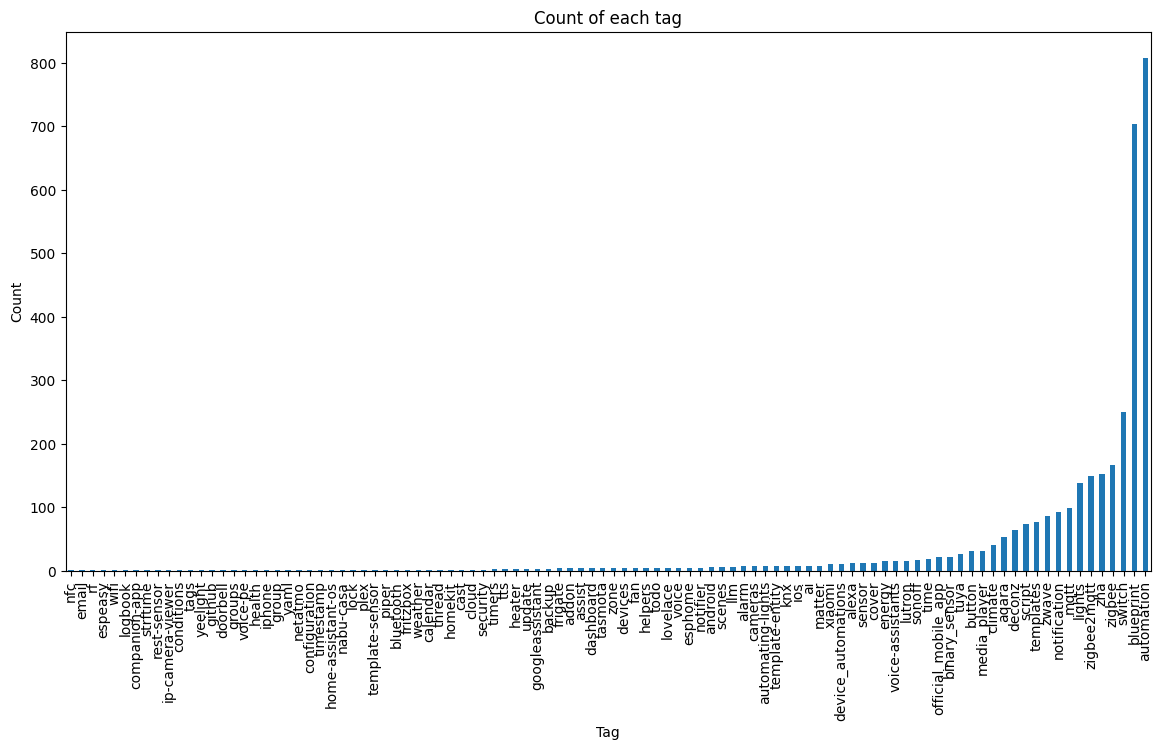

In [11]:
# plot the count of each tag
plt.figure(figsize=(14, 7))
plt.title("Count of each tag")
plt.xlabel("Tag")
plt.ylabel("Count")
tags_columns = [col for col in df.columns if col.startswith('tag_')]
df_tags = df[tags_columns]
new_columns = [col.replace('tag_', '') for col in df_tags.columns]
df_tags = df_tags.rename(columns=dict(zip(df_tags.columns, new_columns)))
df_tags.sum().sort_values().plot(kind="bar")


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'posts_count'}>,
        <Axes: title={'center': 'reply_count'}>,
        <Axes: title={'center': 'highest_post_number'}>,
        <Axes: title={'center': 'created_at'}>],
       [<Axes: title={'center': 'last_posted_at'}>,
        <Axes: title={'center': 'visible'}>,
        <Axes: title={'center': 'closed'}>,
        <Axes: title={'center': 'archived'}>,
        <Axes: title={'center': 'category_id'}>],
       [<Axes: title={'center': 'pinned_globally'}>,
        <Axes: title={'center': 'word_count'}>,
        <Axes: title={'center': 'user_id'}>,
        <Axes: title={'center': 'slow_mode_seconds'}>,
        <Axes: title={'center': 'pinned'}>],
       [<Axes: title={'center': 'current_post_number'}>,
        <Axes: title={'center': 'chunk_size'}>,
        <Axes: title={'center': 'bookmarked'}>,
        <Axes: title={'center': 'message_bus_last_id'}>,
        <Axes: title={'center': 'participant_count'}>],
       

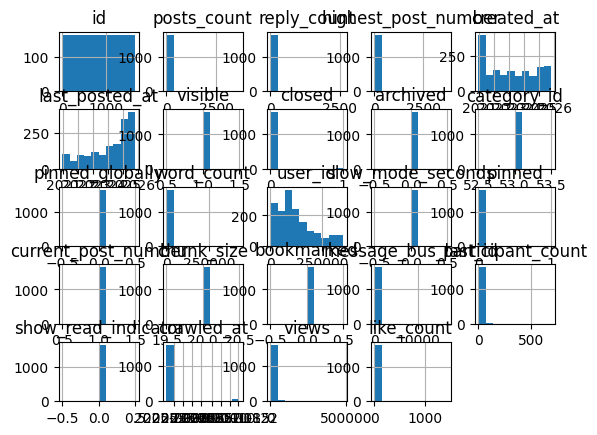

In [12]:
df = _df.copy()
df.hist()